In [1]:
import zarrdataset as zds

import torch
from torch.utils.data import DataLoader

In [2]:
# These are images from the Image Data Resource (IDR) 
# https://idr.openmicroscopy.org/ that are publicly available and were 
# converted to the OME-NGFF (Zarr) format by the OME group. More examples
# can be found at Public OME-Zarr data (Nov. 2020)
# https://www.openmicroscopy.org/2020/11/04/zarr-data.html

filenames = [
    "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0073A/9798462.zarr"
]

In [3]:
import random
import numpy as np

# For reproducibility
np.random.seed(478963)
torch.manual_seed(478964)
random.seed(478965)

In [4]:
patch_size = dict(Y=1024, X=1024)
patch_sampler = zds.BlueNoisePatchSampler(patch_size=patch_size)

In [5]:
image_specs = zds.ImagesDatasetSpecs(
  filenames=filenames,
  data_group="0",
  source_axes="TCZYX",
)

my_dataset = zds.ZarrDataset(image_specs,
                             patch_sampler=patch_sampler,
                             shuffle=True)

In [6]:
my_dataset

ZarrDataset (PyTorch support:True, tqdm support :True)
Modalities: images
Transforms order: []
Using images modality as reference.
Using <class 'zarrdataset._samplers.BlueNoisePatchSampler'> for sampling patches of size {'Z': 1, 'Y': 1024, 'X': 1024}.

In [7]:
import torchvision

img_preprocessing = torchvision.transforms.Compose([
    zds.ToDtype(dtype=np.float32),
])

my_dataset.add_transform("images", img_preprocessing)

In [8]:
my_dataset

ZarrDataset (PyTorch support:True, tqdm support :True)
Modalities: images
Transforms order: [('images',)]
Using images modality as reference.
Using <class 'zarrdataset._samplers.BlueNoisePatchSampler'> for sampling patches of size {'Z': 1, 'Y': 1024, 'X': 1024}.

In [9]:
my_dataloader = DataLoader(my_dataset, num_workers=0)

In [10]:
samples = []
for i, sample in enumerate(my_dataloader):
    # Samples generated by DataLoaders have Batch (B) as first axes
    samples.append(np.moveaxis(sample[0, 0, :, 0].numpy(), 0, -1))

    print(f"Sample {i+1} with size {sample.shape}")

    if i >= 4:
        # Take only five samples for illustration purposes
        break

samples = np.hstack(samples)

Sample 1 with size torch.Size([1, 1, 3, 1, 1024, 1024])


Sample 2 with size torch.Size([1, 1, 3, 1, 1024, 1024])


Sample 3 with size torch.Size([1, 1, 3, 1, 1024, 1024])


Sample 4 with size torch.Size([1, 1, 3, 1, 1024, 1024])


Sample 5 with size torch.Size([1, 1, 3, 1, 1024, 1024])


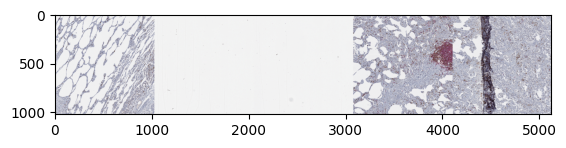

In [11]:
import matplotlib.pyplot as plt

plt.imshow(samples / 255.0)
plt.show()

In [12]:
patch_size = dict(Y=256, X=256)
patch_sampler = zds.BlueNoisePatchSampler(patch_size=patch_size)

In [13]:
image_specs = zds.ImagesDatasetSpecs(
  filenames=filenames,
  data_group="3",
  source_axes="TCZYX",
)

my_dataset = zds.ZarrDataset(image_specs,
                             patch_sampler=patch_sampler,
                             shuffle=True)

In [14]:
my_dataloader = DataLoader(my_dataset, num_workers=4,
                           worker_init_fn=zds.zarrdataset_worker_init_fn)

In [15]:
samples = []
for i, sample in enumerate(my_dataloader):
    # Samples generated by DataLoaders have Batch (B) as first axes
    samples.append(np.moveaxis(sample[0, 0, :, 0].numpy(), 0, -1))

    print(f"Sample {i+1} with size {sample.shape}")

    if i >= 4:
        # Take only five samples for illustration purposes
        break

samples = np.hstack(samples)

Sample 1 with size torch.Size([1, 1, 3, 1, 256, 256])


Sample 2 with size torch.Size([1, 1, 3, 1, 256, 256])


Sample 3 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 4 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 5 with size torch.Size([1, 1, 3, 1, 256, 256])


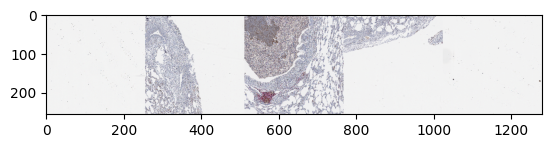

In [16]:
plt.imshow(samples)
plt.show()